# COMP0005 - GROUP COURSEWORK 2023-24
# Gesture Recognition via Convex Hull 

Use the cell below for all python code needed to realise the **Jarvis march algorithm** (including auxiliary data structures and functions needed by this algorithm - if any). The `jarvismarch()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points (`outputSet`) that lie on the convex hull.

In [2]:
import math
from typing import *

# find the orientation of three 2D points - to see if the rotation from points is counterclockwise or clockwise based on the middle point (p2)
def orientation(p1 : Tuple[float,float],p2 : Tuple[float,float] ,p3: Tuple[float,float]) -> int:
        # find the difference of the gradients between p3 and p2, and p2 and p1, to check the orientation
        grad_diff = ((p3[1]-p2[1])*(p2[0]-p1[0])) - ((p2[1]-p1[1])*(p3[0]-p2[0]))
        
        # check if the orientation is counterclockwise (so return 1) - as we prefer the orientation to be counterclockwise in the Jarvis March algorithm.
        if grad_diff > 0:
                return 1
        # check if the orientation is clockwise (so return -1)
        elif grad_diff < 0:
                return -1
        # otherwise the orientation will be collinear (so return 0) - so there is no slope but a straight line
        else:
                return 0
def dist(p1 : Tuple[float,float], p2: Tuple[float,float]) -> float:
        return math.sqrt((p2[1]-p1[1])**2 +(p2[0]-p1[0])**2)

# tutorial: https://www.youtube.com/watch?v=nBvCZi34F_o
def jarvismarch(inputSet : List[Tuple[float,float]]) -> List[Tuple[float,float]]:
    '''
    Returns the list of points that lie on the convex hull (jarvis march algorithm)
            Parameters:
                    inputSet (list): a list of 2D points

            Returns:
                    outputSet (list): a list of 2D points
    '''
    # find the left-most point
    leftmostPoint = min(inputSet)
    outputSet = []
    while True:
        outputSet.append(leftmostPoint)
        next_point = inputSet[0]
        for point in inputSet:
                rotation = orientation(leftmostPoint, next_point, point)
                # check if the rotation is counterclockwise, where the first point is the next point in the hull
                if next_point == leftmostPoint or rotation == 1 or (rotation == 0 and dist(leftmostPoint, point) > dist(leftmostPoint,next_point)):
                        next_point = point
        
        # now check for the next point after finding the point that is on the convex hull                
        leftmostPoint = next_point
        # check if the algorithm returns back to the starting point and then end the loop, returning the coordinates of the hull.
        if leftmostPoint == outputSet[0]:
                # append to outputSet so a convex hull can be plotted
                outputSet.append(leftmostPoint)
                break  

    #ADD YOUR CODE HERE

    return outputSet

jarvismarch([(2,2),(3,1),(4,-4),(-1,-6),(-3,4),(1,1)])

[(-3, 4), (2, 2), (3, 1), (4, -4), (-1, -6), (-3, 4)]

Use the cell below for all python code needed to realise the **Graham scan** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `grahamscan()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [3]:
def getPolarAngle(v1 : Tuple[float, float], v2 : Tuple[float, float]) -> float:
# calculate the polar angle
        polarAngle = math.atan2(v2[1] - v1[1], v2[0] - v1[0])
        return polarAngle

# find the orientation of three 2D points - to see if the rotation from points is counterclockwise or clockwise based on the middle point (p2)
def orientation(p1 : Tuple[float,float],p2 : Tuple[float,float] ,p3: Tuple[float,float]) -> int:
        # find the difference of the gradients between p3 and p2, and p2 and p1, to check the orientation
        grad_diff = ((p3[1]-p2[1])*(p2[0]-p1[0])) - ((p2[1]-p1[1])*(p3[0]-p2[0]))
        
        # check if the orientation is counterclockwise (so return 1) - as we prefer the orientation to be counterclockwise in the Jarvis March algorithm.
        if grad_diff > 0:
                return 1
        # check if the orientation is clockwise (so return -1)
        elif grad_diff < 0:
                return -1
        # otherwise the orientation will be collinear (so return 0) - so there is no slope but a straight line
        else:
                return 0

# positive if clockwise / negative if counterclockwise
def crossProduct(v1 : Tuple[float, float],v2 : Tuple[float, float]) -> int:
        crossProduct =  (v1[0] * v2[1] ) - (v1[1] * v2[0])
        # check if crossProduct is negative (check if counterclockwise)
        if crossProduct < 0:
                return 1
        # check if crossProduct is positive (check if clockwise)
        elif crossProduct > 0:
                return -1


# tutorial: https://www.youtube.com/watch?v=SBdWdT_5isI
def grahamscan(inputSet):
    '''
    Returns the list of points that lie on the convex hull (graham scan algorithm)
            Parameters:
                    inputSet (list): a list of 2D points

            Returns:
                    outputSet (list): a list of 2D points
    '''

    #ADD YOUR CODE HERE
    lowestPoint = min(inputSet, key=lambda x:x[1])
    # Sort the points based on the polar angle relative to the bottom most point and horizontal
    inputSet.sort(key = lambda x: (getPolarAngle(lowestPoint, x), dist(lowestPoint, x)))
    outputSet = []
    for i in range(len(inputSet)):
        # while the program makes a clockwise turn, 
        while len(outputSet) >= 2 and orientation(outputSet[-2], outputSet[-1], inputSet[i]) != 1:
            outputSet.pop()
        outputSet.append(inputSet[i])
        
# append the lowest point to outputSet so that the convex hull can be plotted in a graph
    outputSet.append(lowestPoint)
    return outputSet

grahamscan([(2,2),(3,1),(4,-4),(-1,-6),(-3,4),(1,1)])

[(-1, -6), (4, -4), (3, 1), (2, 2), (-3, 4), (-1, -6)]

Use the cell below for all python code needed to realise the **Chen's** algorithm (including auxiliary data structures and functions needed by this algorithm - if any). The `chen()` function itself should take as input parameter a list of 2D points (`inputSet`), and return the subset of such points that lie on the convex hull (`outputSet`).

In [4]:
def getGroupPoints(inputSet,m):
        ans = []
        n = len(inputSet)
        for i in range(0, n, m):
            group = inputSet[i:i+m]
            ans.extend(grahamscan(group))
        return ans

def chen(inputSet):
    '''
    Returns the list of points that lie on the convex hull (chen's algorithm)
            Parameters:
                    inputSet (list): a list of 2D points

            Returns:
                    outputSet (list): a list of 2D points
    '''

    #ADD YOUR CODE HERE
    startPoints = min(inputSet)
    m = 3
    while m <= len(inputSet):
            points = getGroupPoints(inputSet,m)
            results = jarvismarch(points)
            if results[-1] == startPoints:
                return results
            m = m*m    
    return []




Use the cell below to implement the **synthetic data generator** needed by your experimental framework (including any auxiliary data structures and functions you might need - be mindful of code readability and reusability).

In [5]:
import random
import random
import math

class TestDataGenerator():
    
    def __init__(self,num_points, polygon = 0):
        self.num_points = num_points
        self.polygon = polygon
        

    def generate_points(self):
        rand_points = []
        for _ in range(self.num_points):
            x = random.randint(0,32767)
            y = random.randint(0,32767)
            rand_points.append((x,y))
        return rand_points
    
    def generate_polygon_points(num_points, num_sides, radius):
        points = []
        angle = 2 * math.pi / num_sides

        for i in range(num_sides):
            x = radius * math.cos(i * angle)
            y = radius * math.sin(i * angle)
            points.append((x, y))

        return points


Use the cell below to implement the requested **experimental framework** API.

In [1]:
import timeit
import matplotlib.pyplot as plt

class ExperimentalFramework():
    """
    A class to represent an experimental framework.

    ...

    Attributes
    ----------
    
    [to be defined as part of the coursework]

    Methods
    -------
    
    [to be defined as part of the coursework]

    """
        
    #ADD YOUR CODE HERE
    
    def __init__():
        pass

Use the cell below to illustrate the python code you used to **fully evaluate** the three convex hull algortihms under considerations. The code below should illustrate, for example, how you made used of the **TestDataGenerator** class to generate test data of various size and properties; how you instatiated the **ExperimentalFramework** class to  evaluate each algorithm using such data, collect information about their execution time, plots results, etc. Any results you illustrate in the companion PDF report should have been generated using the code below.

[(1087, 30784), (13937, 15008), (8750, 23356), (14951, 12659), (32187, 20781), (8057, 27435), (3885, 13232), (28008, 8088), (25460, 17903), (12420, 2229), (12390, 97), (4208, 25108), (5806, 29626), (4782, 30191), (725, 15378), (124, 15107), (6368, 27817), (15366, 22513), (11509, 24541), (10561, 22560), (28552, 25337), (2547, 12894), (1804, 24466), (17283, 21650), (17813, 11215), (9450, 25799), (4245, 4600), (27992, 21893), (183, 30252), (12723, 5815), (18872, 14135), (452, 2724), (10738, 28601), (890, 25167), (27985, 28098), (5092, 22642), (10945, 10155), (1817, 22612), (9606, 556), (10848, 32023), (14102, 2764), (6502, 3048), (22550, 30953), (6219, 1844), (10670, 1648), (28212, 10738), (29090, 12498), (7521, 15528), (24837, 10223), (27784, 32114), (16843, 2886), (31933, 15890), (16278, 29861), (9131, 16665), (21026, 17522), (18640, 6506), (6180, 15698), (31527, 7721), (24255, 22372), (28056, 32492), (967, 30329), (22014, 5371), (23994, 22213), (28052, 9331), (64, 19909), (22025, 29991

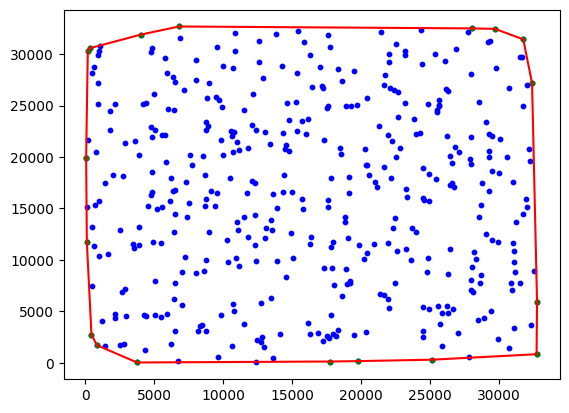

In [27]:
# ADD YOUR TEST CODE HERE 
# ADD YOUR TEST CODE HERE 
# Create an instance of TestDataGenerator
data_generator = TestDataGenerator(423)

# Call the generate_points() method
points = data_generator.generate_points()


print(points)

jarvis_march_points = jarvismarch(points)

x = [i[0] for i in points]
y = [i[1] for i in points]

jarvis_x = [i[0] for i in jarvis_march_points]
jarvis_y = [i[1] for i in jarvis_march_points]

plt.scatter(x,y, color = 'blue', s = 10)
plt.scatter(jarvis_x, jarvis_y, color = 'green', s = 10)
plt.plot(jarvis_x, jarvis_y, color = 'red')
plt.show()




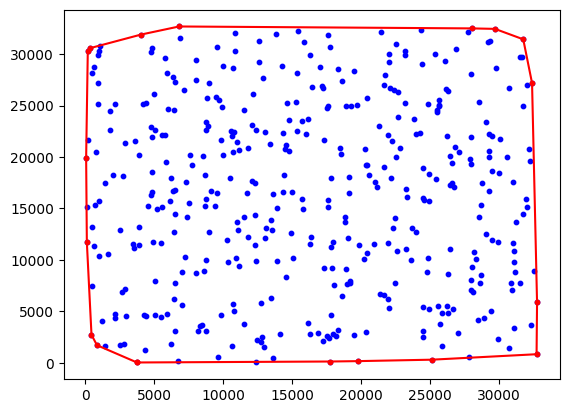

In [28]:
graham_points = grahamscan(points)
graham_x= [i[0] for i in graham_points]
graham_y = [i[1] for i in graham_points]
plt.scatter(x,y, color = 'blue', s = 10)
plt.scatter(graham_x, graham_y, color = 'red', s = 10)
plt.plot(graham_x, graham_y, color = 'red')

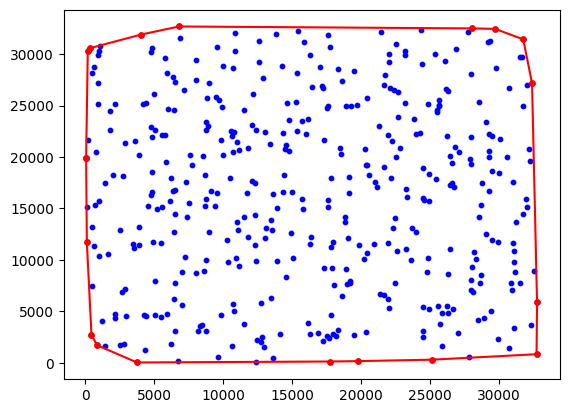

In [31]:
chan_points = chen(points)
chan_x= [i[0] for i in chan_points]
chan_y = [i[1] for i in chan_points]
plt.scatter(x,y, color = 'blue', s = 10)
plt.scatter(chan_x, chan_y, color = 'red', s = 15)
plt.plot(chan_x, chan_y, color = 'red')


In [32]:
print(len(jarvis_march_points) == len(graham_points) == len(chan_points))

True
